# PROJECT 1:
## Marketing Campaign Analysis

## Problem Statement

In this project, we will analyze a dataset to provide insights into the effectiveness of different marketing campaigns in the hospital sector. We aim to determine which marketing campaigns yield the highest return on investment (ROI) for different hospital field types. The hospital field types include Medium, Large, Small, and Private Facilities. The marketing campaigns being evaluated are Phone, Email, Flyers, and Sales Visitors (Sales Contacts).

Using machine learning technques, we will identify which marketing strategies are most effective for each field type, helping to optimize marketing efforts and maximize ROI.


### 1) Importing The Libraries Required

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from io import StringIO

### 2) Importing The Dataset from the Local Machine

In [26]:
file_path = 'Campaign-Data.csv'
df = pd.read_csv(file_path)

### 3) Look of Dataset

In [4]:
df.head(3) #printing the first 3 rows

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


### 4) Checking The Null Values

In [27]:
df.isnull().sum()

Client ID                0
Client Type              0
Number of Customers      0
Montly Target            0
Zip Code                 0
Calendardate             0
Amount Collected         0
Unit Sold                0
Campaign (Email)         0
Campaign (Flyer)         0
Campaign (Phone)         0
Sales Contact 1          0
Sales Contact 2          0
Sales Contact 3          0
Sales Contact 4          0
Sales Contact 5          0
Number of Competition    0
dtype: int64

- No Null values in the dataset exist now we will have a look at the data types of dataset

In [28]:
df.dtypes

Client ID                 object
Client Type               object
Number of Customers        int64
Montly Target              int64
Zip Code                   int64
Calendardate              object
Amount Collected           int64
Unit Sold                  int64
Campaign (Email)         float64
Campaign (Flyer)         float64
Campaign (Phone)         float64
Sales Contact 1          float64
Sales Contact 2          float64
Sales Contact 3          float64
Sales Contact 4          float64
Sales Contact 5          float64
Number of Competition     object
dtype: object

- the data type of calendar date is in object form so we will have to convert it into a proper datetime format

In [29]:
# Convert 'Calendardate' to datetime format
df['Calendardate'] = pd.to_datetime(df['Calendardate'], format='%d-%m-%Y')

### 5) Making Secondary Copy of Dataset with client ID dropped

In [30]:
df1 = df.drop('Client ID', axis=1)

### 6) Looking at the distribution of data based on client Types

Client Type
Large Facility      0.459677
Small Facility      0.282258
Medium Facility     0.169355
Private Facility    0.088710
Name: proportion, dtype: float64


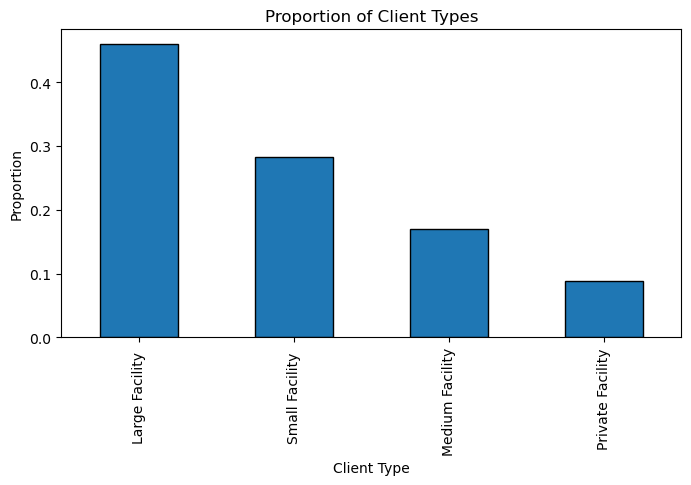

In [31]:
client_type_proportion = df1['Client Type'].value_counts(normalize=True)
print(client_type_proportion)

#Visulaization of the distribution
plt.figure(figsize=(8,4))
client_type_proportion.plot(kind='bar',edgecolor='black')
plt.title('Proportion of Client Types')
plt.xlabel('Client Type')
plt.ylabel('Proportion')
plt.show()

### 7) Creating a Cross Table based on Number of Competition and Client Type

In [32]:
pd.crosstab(df1['Number of Competition'], df1['Client Type'], margins=True, normalize='columns')

Client Type,Large Facility,Medium Facility,Private Facility,Small Facility,All
Number of Competition,,,,,
High,0.166667,0.166667,0.166667,0.166667,0.166667
Low,0.833333,0.833333,0.833333,0.833333,0.833333


- The cross-tabulation table shows the distribution of Client Type by Number of Competition. The table reveals that:
- 
Across all Client Type categories, the majority (83.33%) have a low number of competition, while a smaller proportion (16.67%) have a high number of competition

### 8) A look at the Means

In [33]:
df1.drop(['Number of Competition','Zip Code','Calendardate'],axis = 1).groupby(by='Client Type').mean().T

Client Type,Large Facility,Medium Facility,Private Facility,Small Facility
Number of Customers,1.380842e+03,3.940762e+03,4.007273e+02,4.225143e+02
Montly Target,7.157895e+01,2.028571e+02,2.045455e+01,2.128571e+01
Amount Collected,1.999880e+07,4.075997e+07,5.030246e+06,1.637759e+06
Unit Sold,1.430987e+02,2.905833e+02,3.578409e+01,1.168929e+01
Campaign (Email),1.422736e+05,4.372171e+05,5.183715e+03,1.197599e+04
Campaign (Flyer),8.192056e+05,1.552603e+06,2.272919e+05,9.120875e+04
Campaign (Phone),4.559544e+04,4.917685e+04,5.522470e+03,0.000000e+00
Sales Contact 1,1.336678e+05,3.986458e+05,1.221591e+03,8.062500e+03
Sales Contact 2,2.034013e+06,4.822783e+06,6.376705e+05,7.617143e+05
Sales Contact 3,2.017039e+06,4.698646e+06,4.434375e+05,3.727946e+05


In [34]:
df1.drop(['Client Type','Zip Code','Calendardate'],axis = 1).groupby(by='Number of Competition').mean().T

Number of Competition,High,Low
Number of Customers,1.456935e+03,1.456935e+03
Montly Target,7.508065e+01,7.508065e+01
Amount Collected,2.974789e+07,1.445570e+07
Unit Sold,2.131270e+02,1.031323e+02
Campaign (Email),1.053989e+05,1.508622e+05
Campaign (Flyer),9.940467e+05,6.236930e+05
Campaign (Phone),4.519804e+04,2.669330e+04
Sales Contact 1,1.469456e+05,1.282198e+05
Sales Contact 2,2.685333e+06,1.890916e+06
Sales Contact 3,1.786754e+06,1.883634e+06


### 9) Updating Column Names For easy use

In [35]:
# Update column names
df1.columns = [col.replace(" ", "_").replace("(", "").replace(")", "") for col in df1.columns]

### 10) Correlation Analysis

In [36]:
# Correlation analysis
correlation_analysis = pd.DataFrame(df1[['Amount_Collected', 'Campaign_Email', 'Campaign_Flyer', 'Campaign_Phone',
                                         'Sales_Contact_1', 'Sales_Contact_2', 'Sales_Contact_3', 'Sales_Contact_4',
                                         'Sales_Contact_5']].corr()['Amount_Collected']).reset_index()
correlation_analysis.columns = ['Impacting_Variable', 'Degree_of_Linear_Impact_(Correlation)']
correlation_analysis = correlation_analysis[correlation_analysis['Impacting_Variable'] != 'Amount_Collected']
correlation_analysis = correlation_analysis.sort_values('Degree_of_Linear_Impact_(Correlation)', ascending=False)

# Format the correlation analysis table
cm = sns.light_palette("Orange", as_cmap=True)
correlation_analysis.style.background_gradient(cmap=cm).format(precision=4)

,Impacting_Variable,Degree_of_Linear_Impact_(Correlation)
5,Sales_Contact_2,0.5521
2,Campaign_Flyer,0.4443
6,Sales_Contact_3,0.3579
4,Sales_Contact_1,0.2775
1,Campaign_Email,0.2482
7,Sales_Contact_4,0.2362
8,Sales_Contact_5,0.0958
3,Campaign_Phone,0.0349


### 10) Market Strategy Impact on Sales(Broken By Different Account Types)

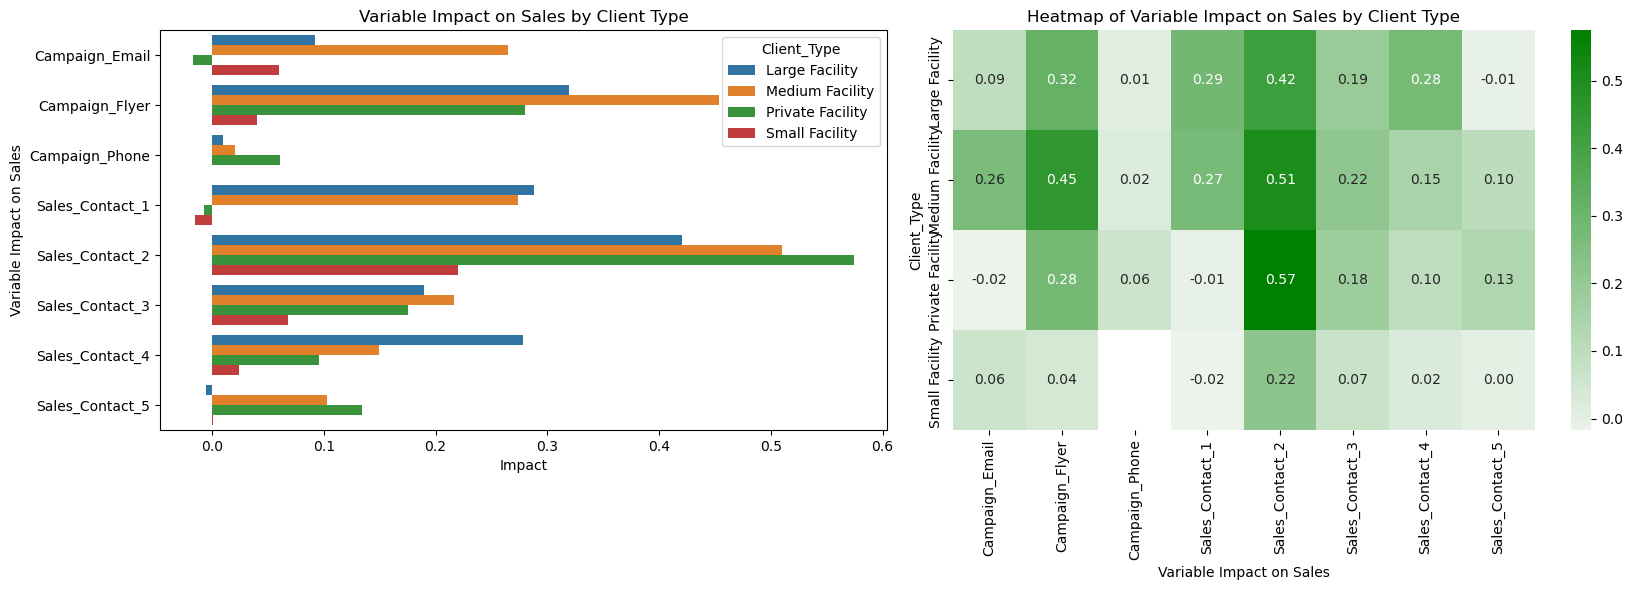

In [38]:
correlation_analysis = pd.DataFrame(df1.groupby(by='Client_Type')[['Amount_Collected',
       'Campaign_Email', 'Campaign_Flyer', 'Campaign_Phone',
       'Sales_Contact_1', 'Sales_Contact_2', 'Sales_Contact_3',
       'Sales_Contact_4', 'Sales_Contact_5']].corr()['Amount_Collected']).reset_index()

correlation_analysis.columns = ['Client_Type', 'Variable Impact on Sales', 'Impact']
correlation_analysis = correlation_analysis[correlation_analysis['Variable Impact on Sales']!= 'Amount_Collected'].reset_index(drop=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 6))

# Bar plot
sns.barplot(x='Impact', y='Variable Impact on Sales', hue='Client_Type', data=correlation_analysis, ax=ax1)
ax1.set_title('Variable Impact on Sales by Client Type')

# Pivot table for heatmap
pivot_table = correlation_analysis.pivot_table(index='Client_Type', columns='Variable Impact on Sales', values='Impact')

# Heatmap
cm = sns.light_palette("green", as_cmap=True)
sns.heatmap(pivot_table, cmap=cm, annot=True, fmt=".2f", ax=ax2)
ax2.set_title('Heatmap of Variable Impact on Sales by Client Type')

plt.tight_layout()
plt.show()

### 11) Regression Model

#### 11.1) MLR using Scikit Learn

In [39]:
# required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Spliting data into training and testing sets
X = df1[['Campaign_Email', 'Campaign_Flyer', 'Campaign_Phone', 'Sales_Contact_1', 'Sales_Contact_2', 'Sales_Contact_3', 'Sales_Contact_4', 'Sales_Contact_5']]
y = df1['Amount_Collected']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression using scikit-learn
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train, y_train)
y_pred = lr_sklearn.predict(X_test)

In [18]:
# Print coefficients from scikit-learn
print("Co efficients")
print(lr_sklearn.coef_)


Co efficients
[ 0.86595412  3.29959757  0.26862487  4.9869425   3.64854696  2.45619574
 12.45260812  3.51158274]


#### 11.2) OLS using statsmodels

In [40]:
# Regression analysis using statsmodels
results = smf.ols('Amount_Collected ~ Campaign_Email + Campaign_Flyer + Campaign_Phone + Sales_Contact_1 + '
                  'Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4 + Sales_Contact_5', data=df1).fit()

### 12) Finiding and Visualising Return On Investment(ROI)

In [45]:
# Initialize an empty list to store the results
results_list = []

# Regression analysis by Client Type
for acctype in df1['Client_Type'].unique():
    temp_data = df1[df1['Client_Type'] == acctype].copy()
    results = smf.ols('Amount_Collected ~ Campaign_Email + Campaign_Flyer + Campaign_Phone + Sales_Contact_1 + '
                      'Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()
    
    # Convert the summary table to a DataFrame
    html = results.summary().tables[1].as_html()
    df = pd.read_html(StringIO(html), header=0, index_col=0)[0].reset_index()
    df = df[df['P>|t|'] < 0.05][['index', 'coef']]
    df.columns = ['Variable', 'Coefficient_(Impact)']
    df['Account_Type'] = acctype
    df = df.sort_values('Coefficient_(Impact)', ascending=False)
    df = df[df['Variable'] != 'Intercept']
    
    # Append the results to the list
    results_list.append(df)
    
    # print(acctype)
    # print(df)
    # print(results.summary())

# Concatenate all results into a single DataFrame
consolidated_summary = pd.concat(results_list, ignore_index=True)
consolidated_summary.reset_index(inplace=True)
consolidated_summary.drop('index', inplace=True, axis=1)
consolidated_summary.columns = ['Variable', 'Return_on_Investment', 'Account_Type']
consolidated_summary['Return_on_Investment'] = consolidated_summary['Return_on_Investment'].apply(lambda x: round(x, 1))

def format_currency(x):
    return "${:.1f}".format(x)

consolidated_summary['Return_on_Investment'] = consolidated_summary['Return_on_Investment'].apply(format_currency)

#### 12.1) Table:

In [42]:
consolidated_summary

,Variable,Return_on_Investment,Account_Type
0,Campaign_Flyer,$4.1,Medium Facility
1,Sales_Contact_2,$3.6,Medium Facility
2,Sales_Contact_1,$3.1,Medium Facility
3,Sales_Contact_3,$2.1,Medium Facility
4,Sales_Contact_1,$11.7,Large Facility
5,Sales_Contact_4,$10.6,Large Facility
6,Sales_Contact_2,$4.0,Large Facility
7,Campaign_Flyer,$2.7,Large Facility
8,Sales_Contact_3,$2.0,Large Facility
9,Campaign_Phone,$-3.5,Large Facility


#### 12.2) Visulisation

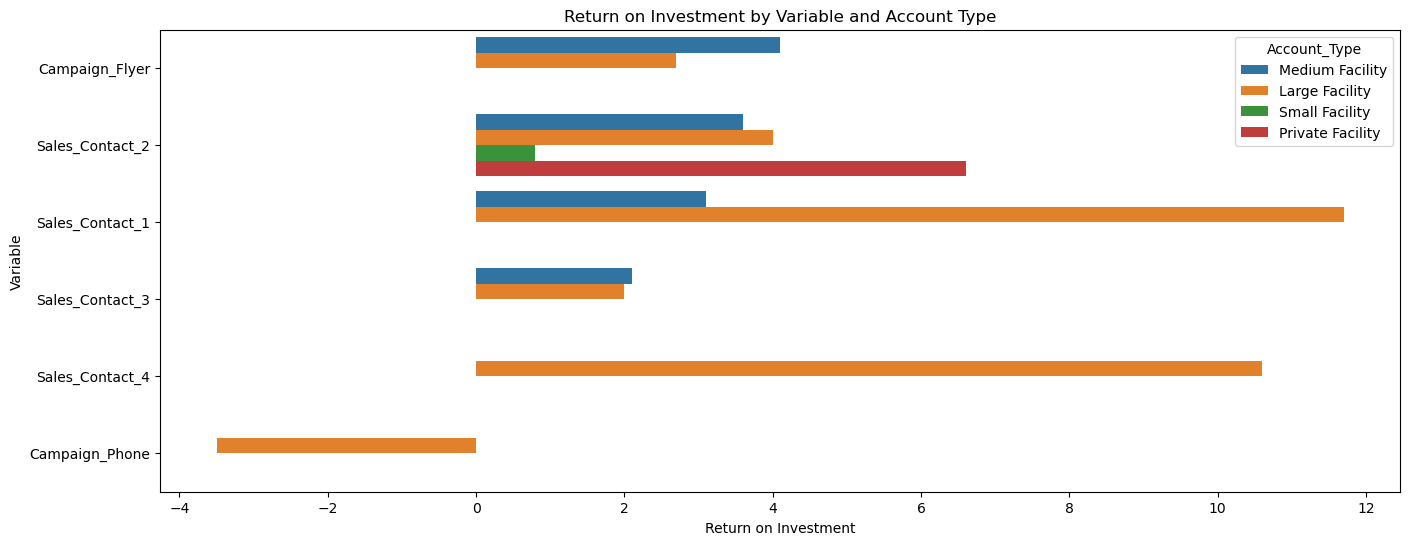

In [46]:
# Converting return on investment values to numeric format
consolidated_summary['Return_on_Investment'] = consolidated_summary['Return_on_Investment'].str.replace('$', '').astype(float)

# Creating the bar plot
plt.figure(figsize=(16,6))
sns.barplot(x="Return_on_Investment", y="Variable", hue="Account_Type", data=consolidated_summary)
plt.title("Return on Investment by Variable and Account Type")
plt.xlabel("Return on Investment")
plt.ylabel("Variable")
plt.show()

### 13) Conclusion
- Using the table and visualization we can see how much return we can derive from each dollar we spend, here we can clearly see that for different account type different Campaigns and Different Sales Contact are effective with different extend.